In [1]:
import pyBigWig
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns

def plot_tracks(tracks, interval, height=1.5, colors=None):
  fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
  for ax, (title, y) in zip(axes, tracks.items()):
    if colors is not None:
      ax.fill_between(np.linspace(interval["start"], interval["end"], num=len(y)), y, color=colors[title])
    else:
      ax.fill_between(np.linspace(interval["start"], interval["end"], num=len(y)), y)
    ax.set_title(title)
    sns.despine(top=True, right=True, bottom=True)
  ax.set_xlabel(f"{interval['chrom']}:{interval['start']}-{interval['end']}")
  plt.tight_layout()

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [4]:
bws = []
os.chdir("/cellar/users/aklie/data/datasets/TCGA_ATAC")
for file in glob.glob(os.path.join("**", "*.bw"), recursive=True):
  bws.append(file)
len(bws)

52

In [5]:
# Plot signal and control
chrom = "chr11"
chromStart = 35_082_742
chromEnd = 35_197_430
interval = dict(chrom=chrom, start=chromStart, end=chromEnd)

In [6]:
# Grab the first 3 tracks
tracks = {}
colors = {}
for bw in bws[:3] + bws[-3:]:
  file = pyBigWig.open(bw)
  signal = file.values(chrom, chromStart, chromEnd)
  signal = np.nan_to_num(signal)
  tracks[os.path.basename(bw)] = signal
  colors[os.path.basename(bw)] = np.random.rand(3,)
  file.close()

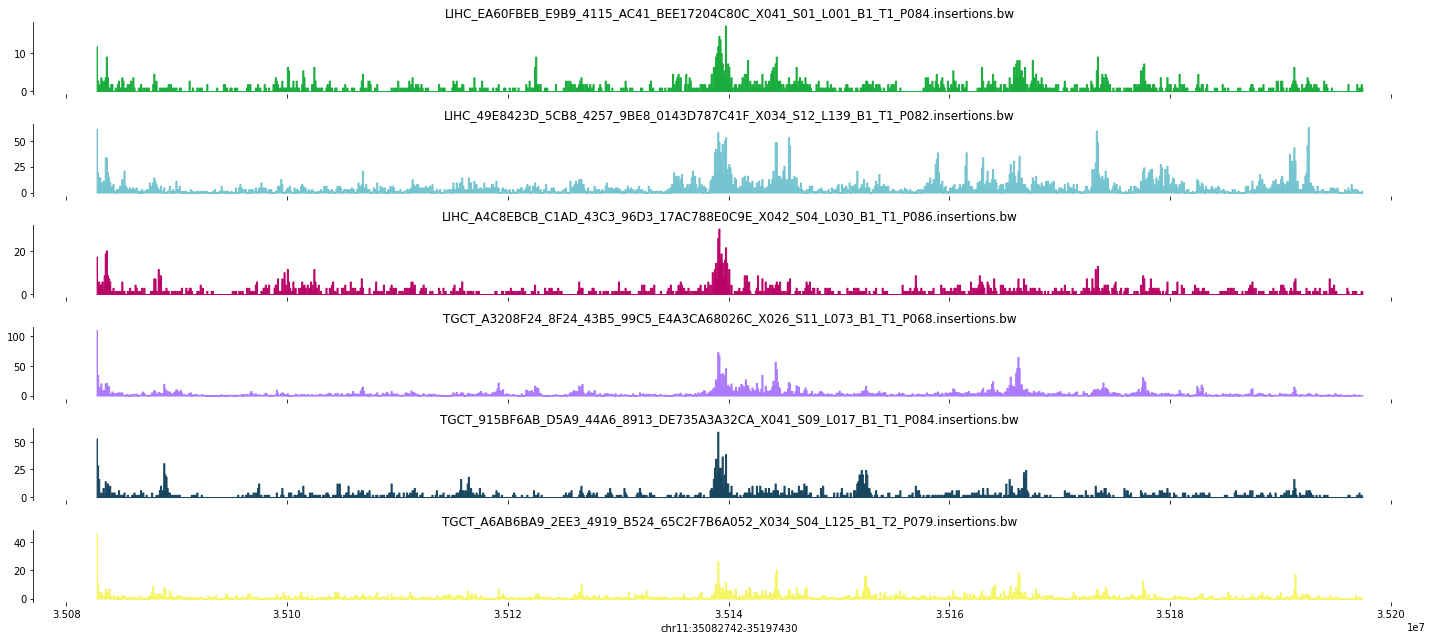

In [7]:
# Plot the tracks
plot_tracks(tracks, interval, colors=colors)